In [1]:
#import Func_Lib as func
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
plt.style.use('seaborn-white')
import time
import os
from glob import glob
import sys
import seaborn as sns
from decimal import Decimal

In [2]:
RCP85_Risk=pd.read_csv('/cluster/tufts/lamontagnelab/gshabe01/Risk_Q_QM_RCP85.csv')


In [5]:
RCP85_Risk.loc[(RCP85_Risk['Q']>=3700)].loc[(RCP85_Risk['Q']<=5100) ]

,Unnamed: 0,Q,Risk50Y,Risk70Y
423,423,3701.499267,63.123593,83.191795
424,424,3733.302152,61.837183,82.146574
425,425,3765.378285,60.550000,81.073363
426,426,3797.730012,59.271991,79.977640
427,427,3830.359702,57.997965,78.858454
428,428,3863.269742,56.733528,77.719312
429,429,3896.462542,55.476823,76.563622
430,430,3929.940532,54.234111,75.392352
431,431,3963.706160,53.002639,74.205665
432,432,3997.761899,51.779467,73.004348


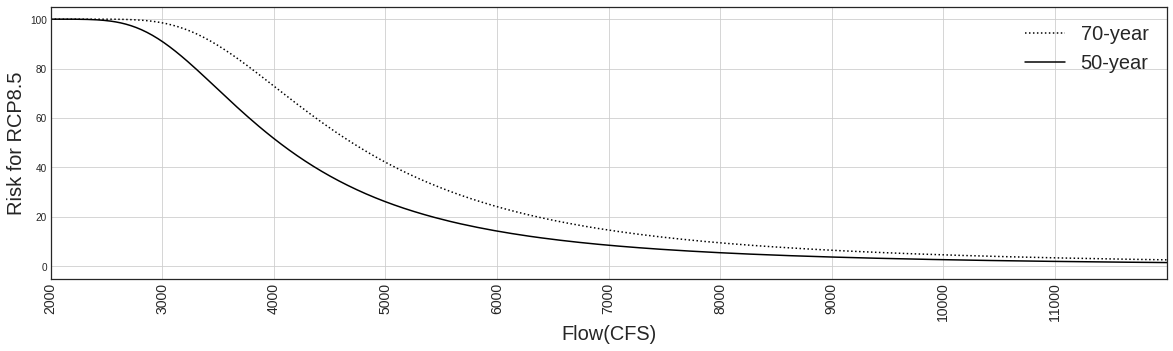

In [30]:
plt.figure(figsize=(20,5))
#plt.plot(warmigns_returnperiod.drop(columns=['warming']).loc[0],risk_70_RCP85,label='70-year RCP85',color='maroon')
plt.plot(RCP85_Risk['Q'],RCP85_Risk['Risk70Y'],color='k',label='70-year',linestyle='dotted')
#plt.plot(warmigns_returnperiod.drop(columns=['warming']).loc[0],risk_50_RCP85,label='50-year RCP85',color='gold')
plt.plot(RCP85_Risk['Q'],RCP85_Risk['Risk50Y'],label='50-year',color='k')

#plt.plot(warmigns_returnperiod.drop(columns=['warming']).loc[0],risk_50_0,label='50-year no-warming',color='silver')
#plt.plot(warmigns_returnperiod.drop(columns=['warming']).loc[0],risk_70_0,label='70-year no-warming',color='dimgray')

plt.xlabel('Flow(CFS)',fontsize=20)
plt.ylabel('Risk for RCP8.5',fontsize=20)
plt.legend(bbox_to_anchor=(1, 1),fontsize=20)


#plt.minorticks_on()

plt.xticks(np.arange(2000, 12000, step=1000),np.arange(2000, 12000, step=1000), size=14,rotation=90)
#plt.xscale('log')
plt.xlim(2000,12000)
#plt.xticks([], minor=True) 
plt.grid(which='minor')
plt.grid(which='major')
plt.savefig('/cluster/tufts/lamontagnelab/gshabe01/Riskflow85.png', bbox_inches='tight',dpi=500)

In [6]:
RCP45_Risk=pd.read_csv('/cluster/tufts/lamontagnelab/gshabe01/Risk_Q_QM_RCP45.csv')

In [7]:
RCP45_Risk.loc[(RCP45_Risk['Q']>=3700)].loc[(RCP45_Risk['Q']<=5100) ]

,Unnamed: 0,Q,Risk50Y,Risk70Y
423,423,3701.499267,52.719044,66.599553
424,424,3733.302152,51.475012,65.304076
425,425,3765.378285,50.244375,64.008351
426,426,3797.730012,49.031285,62.715979
427,427,3830.359702,47.829252,61.422414
428,428,3863.269742,46.641183,60.128097
429,429,3896.462542,45.475416,58.844587
430,430,3929.940532,44.335630,57.576865
431,431,3963.706160,43.206434,56.309100
432,432,3997.761899,42.097061,55.051962


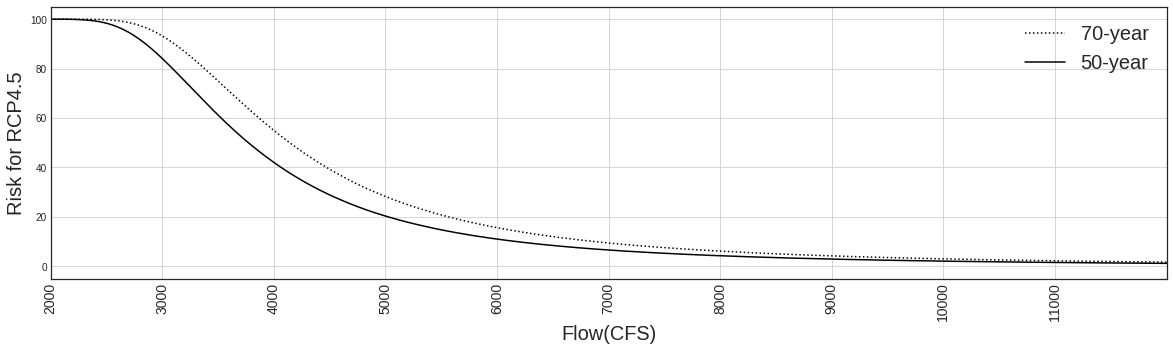

In [34]:
plt.figure(figsize=(20,5))
#plt.plot(warmigns_returnperiod.drop(columns=['warming']).loc[0],risk_70_RCP85,label='70-year RCP85',color='maroon')
plt.plot(RCP45_Risk['Q'],RCP45_Risk['Risk70Y'],color='k',label='70-year',linestyle='dotted')
#plt.plot(warmigns_returnperiod.drop(columns=['warming']).loc[0],risk_50_RCP85,label='50-year RCP85',color='gold')
plt.plot(RCP45_Risk['Q'],RCP45_Risk['Risk50Y'],label='50-year',color='k')

#plt.plot(warmigns_returnperiod.drop(columns=['warming']).loc[0],risk_50_0,label='50-year no-warming',color='silver')
#plt.plot(warmigns_returnperiod.drop(columns=['warming']).loc[0],risk_70_0,label='70-year no-warming',color='dimgray')

plt.xlabel('Flow(CFS)',fontsize=20)
plt.ylabel('Risk for RCP4.5',fontsize=20)
plt.legend(bbox_to_anchor=(1, 1),fontsize=20)

#plt.xscale('log')
plt.xlim(2000,12000)
plt.xticks(np.arange(2000, 12000, step=1000),np.arange(2000, 12000, step=1000), size=14,rotation=90)
plt.grid(which='minor')
plt.grid(which='major')
plt.savefig('/cluster/tufts/lamontagnelab/gshabe01/Riskflow45.png', bbox_inches='tight',dpi=500)

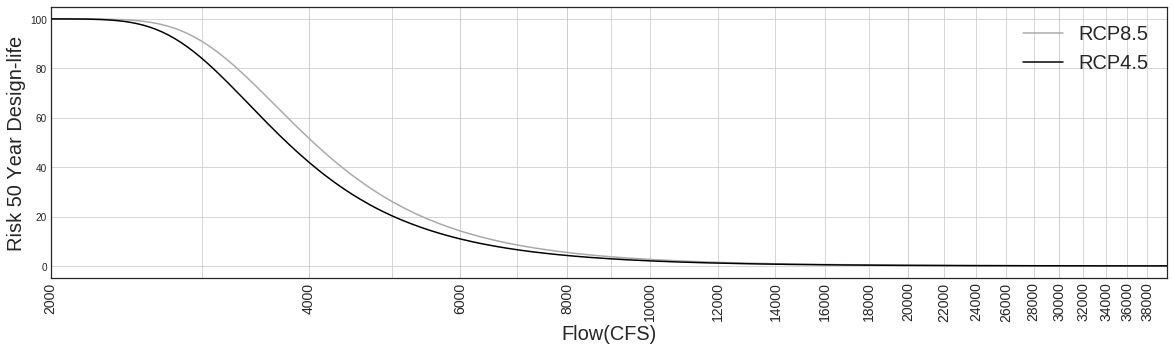

In [10]:
plt.figure(figsize=(20,5))
#plt.plot(warmigns_returnperiod.drop(columns=['warming']).loc[0],risk_70_RCP85,label='70-year RCP85',color='maroon')
plt.plot(RCP85_Risk['Q'],RCP85_Risk['Risk50Y'],color='darkgray',label='RCP8.5')
#plt.plot(warmigns_returnperiod.drop(columns=['warming']).loc[0],risk_50_RCP85,label='50-year RCP85',color='gold')
plt.plot(RCP45_Risk['Q'],RCP45_Risk['Risk50Y'],label='RCP4.5',color='k')

#plt.plot(warmigns_returnperiod.drop(columns=['warming']).loc[0],risk_50_0,label='50-year no-warming',color='silver')
#plt.plot(warmigns_returnperiod.drop(columns=['warming']).loc[0],risk_70_0,label='70-year no-warming',color='dimgray')

plt.xlabel('Flow(CFS)',fontsize=20)
plt.ylabel('Risk 50 Year Design-life',fontsize=20)
plt.legend(bbox_to_anchor=(1, 1),fontsize=20)

plt.xscale('log')
plt.xlim(2000,40000)
plt.xticks(np.arange(2000, 40000, step=2000),np.arange(2000, 40000, step=2000), size=14,rotation=90)
plt.grid(which='minor')
plt.grid(which='major')

In [3]:
Annualmax=np.load('/cluster/tufts/lamontagnelab/gshabe01/annualmax_all.npy')
print(Annualmax.shape)
#A=pd.DataFrame(Annualmax)

(17, 64000000)


In [21]:
Annualmax.T.shape

(64000000, 17)

In [11]:
pd.DataFrame([np.arange(0,2,.5),np.arange(1,3,0.5)],columns=np.arange(0,2,.5))

,0.0,0.5,1.0,1.5
0,0.0,0.5,1.0,1.5
1,1.0,1.5,2.0,2.5


In [23]:
A=pd.DataFrame(Annualmax.T,columns=np.arange(0,8.5,.5))


In [24]:
A.shape
A.to_csv('/cluster/tufts/lamontagnelab/gshabe01/annualmax_all_1.csv')

In [1]:
A.shape

NameError: name 'A' is not defined